<a href="https://colab.research.google.com/github/cristianofanchin/puc-rio/blob/main/MVP_Sprint_ADBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Brasao Puc-Rio](https://www.puc-rio.br/imagens/bras_83x140_reduzido.png)

## Puc-Rio
## Pós-Graduação em Ciência de Dados e Analytics
Aluno: Cristiano Weiber Fanchin


## Sprint 1 - Análise de Dados e Boas Práticas - MVP


---

O trabalho aqui apresentado contempla as etapas de análise exploratória e pré-processamento de dados em um dataset contendo mais de 128 mil registros de características de indivíduos e seu perfil psicológico, com base no Indicador de Tipo Myers-Briggs (MBTI), formulado por Katharine Cook Briggs e Isabel Briggs Myer.

O indicador se baseia nas teorias de tipos psicológicos formuladas pelo psiquiatra Carl Jung, oferecendo uma abordagem detalhada para a compreensão das diferenças individuais na personalidade.

![texto alt](https://github.com/cristianofanchin/puc-rio/blob/main/img1.png?raw=true)

O processo envolve responder a uma série de perguntas que avaliam as preferências do indivíduo em **quatro dimensões** principais:

*   Extroversão (E) vs. Introversão (I)
*   Sensação (S) vs. Intuição (N)
*   Pensamento (T) vs. Sentimento (F)
*   Julgamento (J) vs. Percepção (P)

Cada uma dessas dimensões tem duas categorias opostas, e as respostas ao questionário determinam em qual categoria de cada dimensão a pessoa se encaixa. Combinando essas preferências, o MBTI classifica os indivíduos em um dos 16 tipos de personalidade possíveis, cada um representado por um código de quatro letras, organizados as pessoas em 4 categorias: Racionalizadoras, Realizadoras, Idealistas e Exploradoras.

### Racionalizadoras
*Pessoas que se destacam pela abordagem lógica e analítica para resolver problemas. São estrategistas e pensadores independentes, focados em otimização e melhorias.*
1. Arquiteto (INTJ)
2. Lógico (INTP)
3. Inventor (ENTP)
4. Comandante (ENTJ)

### Realizadoras
*Pessoas organizadas e responsáveis, com uma forte orientação para a estrutura e o suporte aos outros. Valorizam a eficiência e o cumprimento de responsabilidades.*
5. Administrador (ISTJ)
6. Supervisor (ESTJ)
7. Provedor (ESFJ)
8. Defensor (ISFJ)

### Idealistas
*Pessoas guiadas por valores profundos e ideais pessoais. Buscam compreender e apoiar os outros, motivadas por um desejo de fazer a diferença e contribuir para causas que acreditam ser justas.*
9. Advogado (INFJ)
10. Mediador (INFP)
11. Protagonista (ENFP)
12. Mentor (ENFJ)

### Exploradoras
*Pessoas práticas e enérgicas, sempre em busca de novas experiências e aventuras. São adaptáveis e espontâneas, com uma abordagem direta para viver e explorar o mundo ao seu redor.*
13. Virtuoso (ISTP)
14. Aventureiro (ISFP)
15. Empreendedor (ESTP)
16. Animador (ESFP)

Fonte: https://br.indeed.com/conselho-de-carreira/desenvolvimento-de-carreira/tipos-de-personalidade

Obs: uma descrição de cada um dos 16 perfis pode ser consultada na URL acima.


---



O dataset em questão, hospedado no Kaggle [neste link](https://www.kaggle.com/datasets/stealthtechnologies/predict-people-personality-types/data), contém atributos representando as quatro dimensões acima citadas pertencentes ao modelo de Myers-Briggs, o perfil de personalidade MBTI resultante, bem como fatores adicionais de cada indivíduo da amostra: idade, gênero, grau de educação e área de interesse principal.

Esse dataset destina-se a estudos de Ciência de Dados e foi por esse motivo escolhido para o MVP, pois permite exercitar visualização de dados, análise de correlações entre atributos e pré-processamento para futuras construções de modelos de *machine learning*.

## Conhecendo o Dataset

Importação das bibliotecas necessárias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leitura dos dados para um dataframe do Pandas:

In [2]:
url = 'https://raw.githubusercontent.com/cristianofanchin/puc-rio/refs/heads/main/people_personality_types.csv'
df = pd.read_csv(url)

Análise das informações principais do dataset:

In [3]:
df.shape

(128061, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [6]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


Observando o retorno dos métodos **df.info()** e **df.head()**, identificamos as variáveis numéricas e categóricas do dataset.

Segundo a documentação presente no Kaggle, as variáveis numéricas da lista abaixo variam entre 0 e 10 e representam a tendência do indivíduo em cada uma das dimensões avaliadas:


*   *Introversion Score*
        ⬆  extroversão    ⬇ introversão
*   *Sensing Score*
        ⬆  sensaçãoo      ⬇ intuição
*   *Thinking Score*
        ⬆  pensamento     ⬇ sentimento
*   *Judging Score*
        ⬆  julgamento     ⬇ percepção






Outra variável numérica é *Age* (idade do indivíduo).

As demais variáveis do dataset são categóricas:



*   *Gender*
        variável binária em forma de string, para represnetar o gênero masculino ou feminino.
*   *Education*
        variável binária, sendo 1 para indicar nível superior completo ou maior, ou 0 para os níveis educacionais inferiores.
*   *Interest*
        string representando a área de interesse principal - possivelmente obtido no questionário com uso de lista de opções.
*   *Personality*
        string de 4 caracteres representando um dos 16 tipos de personalidade do indivíduo segundo o MBTI.



##Descrição do Problema de Ciência de Dados

Pela análise inicial do dataset, percebe-se que os seguintes estudos são possíveis:


*   Análise da amostra para fins de estudos estatísticos dos perfis psicológicos;
*   Avaliação das características por meio de visualização dos dados;
*   Busca de correlações entre os atributos e sua interpretação;
*   Construção de modelo(s) de *machine learning*.

Para essa última possibilidade, o atributo *Personality*  pode ser encarado como o *target* de um modelo de aprendizagem supervisionado, do tipo **classificação**.

Nesse MVP iremos avaliar se os dados presentes no dataset permitem essa abordagem.



## Análise dos Dados

In [ ]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [ ]:
df.duplicated().sum()

0

Pelos comandos acima, percebemos que o dataset está bastante "limpo", pois:
*   todos os atributos têm a mesma quantidade de registros (não há dados faltantes e nem nulos);
*   não há duplicação de linhas;
*   as variáveis numéricas de *Score* estão dentro do domínio previsto (0 a 10);
*   a variável numérica *Age* não tem dados de valor inconsistente.

Também aprendemos que todos os indivíduos desse dataset possuíamos idade maior ou igual a 18 anos, sendo o mais velho com 57 anos e a média em 26,3 anos. É uma amostra de uma população jovem.

Vamos analisar agora a médida de idade por gênero, bem como a quantidade de homens e mulheres na amostra:

In [15]:
df.loc[:,['Age','Gender']].groupby('Gender').mean()

,Age
Gender,
Female,26.35876
Male,26.34118


In [16]:
df.loc[:,['Age','Gender']].groupby('Gender').count()

,Age
Gender,
Female,57629
Male,70432


<Axes: ylabel='count'>

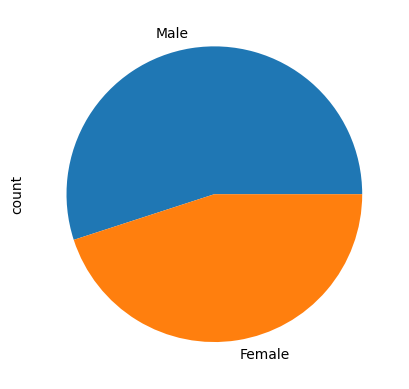

In [ ]:
df['Gender'].value_counts().plot(kind='pie')

As quatro variáveis numéricas de *Score* têm média próximo de 5, o que nos sugere uma distribuição simétrica em relação ao meio da escala.

Consulta ao domínio das variáveis categóricas:

In [17]:
print(f"Gêneros: {df['Gender'].unique()}\n")
print(f"Educação: {df['Education'].unique()}\n")
print(f"Interesses: {df['Interest'].unique()}\n")
print(f"Personalidade: {df['Personality'].unique()}")

Gêneros: ['Male' 'Female']

Educação: [0 1]

Interesses: ['Unknown' 'Sports' 'Others' 'Technology' 'Arts']

Personalidade: ['ENFP' 'ESFP' 'INTP' 'INFP' 'ENFJ' 'ENTP' 'ESTP' 'ISTP' 'INTJ' 'INFJ'
 'ISFP' 'ENTJ' 'ESFJ' 'ISFJ' 'ISTJ' 'ESTJ']


Percebemosque as variáveis categóricas também possuem dados dentro do domínio esperado, sem valores inconsistentes.

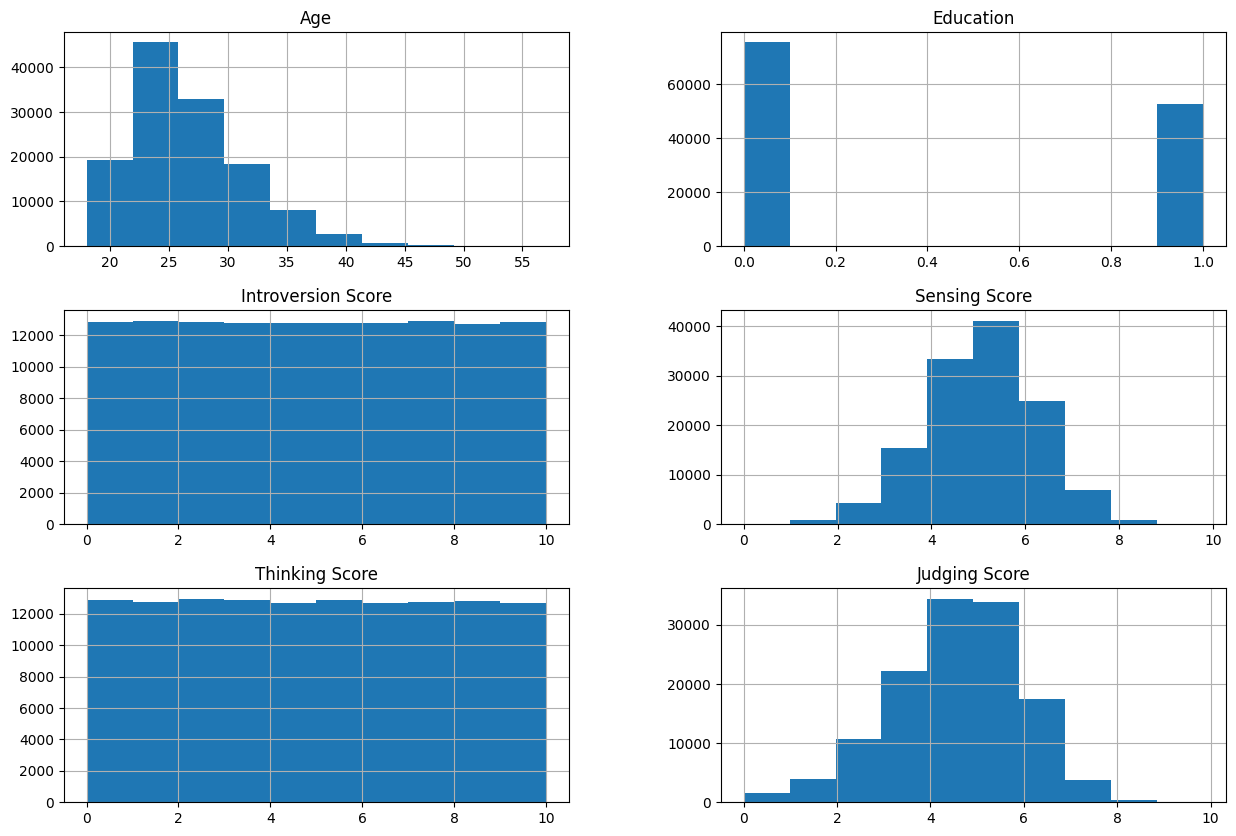

In [ ]:
# Histograma
df.hist(figsize = (15,10))
plt.show()

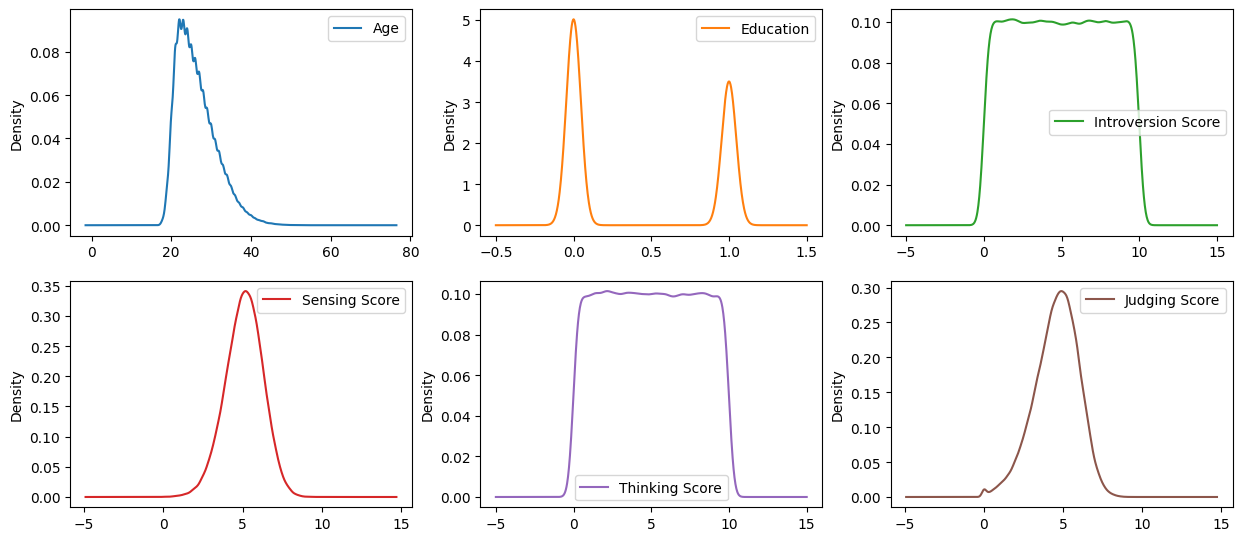

In [ ]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

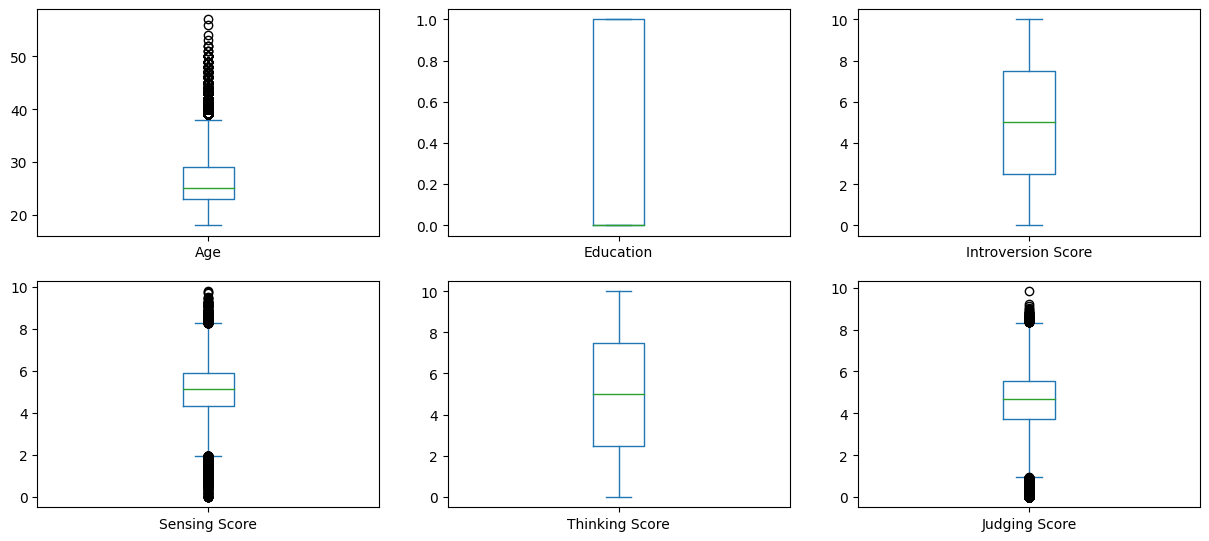

In [ ]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

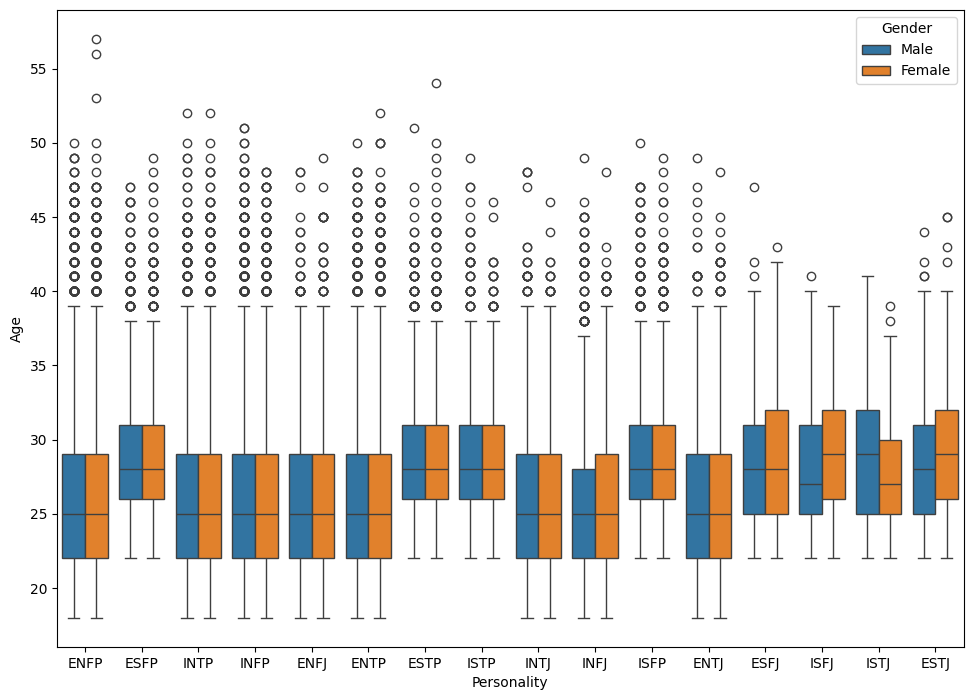

In [ ]:
sns.boxplot(data = df, x = 'Personality', y = 'Age', hue='Gender')
plt.gcf().set_size_inches(11.7, 8.27)
plt.show()

In [ ]:
for pers in df['Personality'].unique():
  print(pers)
print(f"Há {len(df['Personality'].unique())} tipos de personalidades mapeados.")